In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import joblib

### Load Test Data and Embeddings

In [2]:
test_df = pd.read_csv("test_data_cleaned.csv")
test_embeddings = np.load("test_embeddings_mpnet.npy")

### Load trained models

In [3]:
svm_belong = joblib.load("svm_belong_mpnet.pkl")
svm_burden = joblib.load("svm_burden_mpnet.pkl")

### Evaluate on Test Set

In [5]:
print("Evaluating 'belong' classifier on test set...")
test_preds_belong = svm_belong.predict(test_embeddings)
acc_belong = accuracy_score(test_df['belong'], test_preds_belong)
print(f"Accuracy (Belong): {acc_belong:.4f}")
print(classification_report(test_df['belong'], test_preds_belong))

print("\nEvaluating 'burden' classifier on test set...")
test_preds_burden = svm_burden.predict(test_embeddings)
acc_burden = accuracy_score(test_df['burden'], test_preds_burden)
print(f"Accuracy (Burden): {acc_burden:.4f}")
print(classification_report(test_df['burden'], test_preds_burden))

Evaluating 'belong' classifier on test set...
Accuracy (Belong): 0.7767
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       472
           1       0.80      0.80      0.80       585

    accuracy                           0.78      1057
   macro avg       0.77      0.77      0.77      1057
weighted avg       0.78      0.78      0.78      1057


Evaluating 'burden' classifier on test set...
Accuracy (Burden): 0.8420
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       732
           1       0.80      0.65      0.72       325

    accuracy                           0.84      1057
   macro avg       0.83      0.79      0.80      1057
weighted avg       0.84      0.84      0.84      1057



### Confusion Matrices

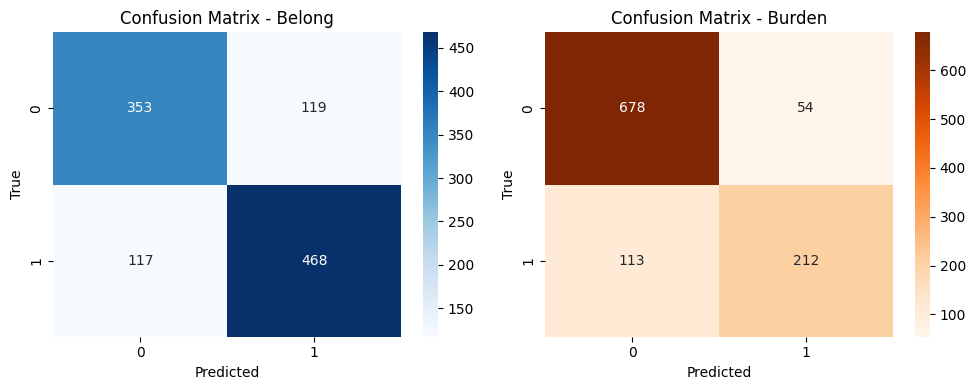

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(test_df['belong'], test_preds_belong), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Belong')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(test_df['burden'], test_preds_burden), annot=True, cmap='Oranges', fmt='d')
plt.title('Confusion Matrix - Burden')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Embedding Visualization (PCA and t-SNE)


Running PCA and t-SNE for visualization (may take a few minutes)...


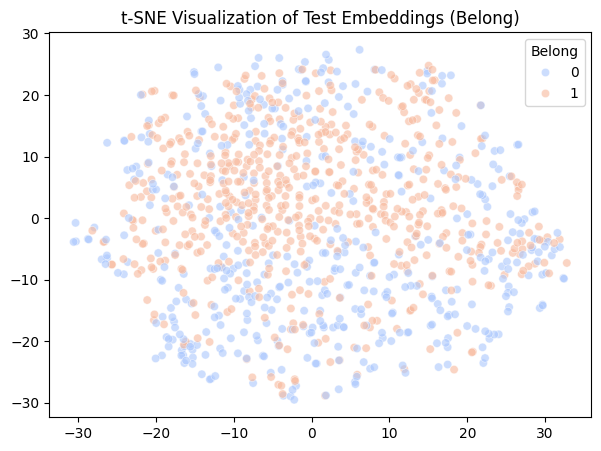

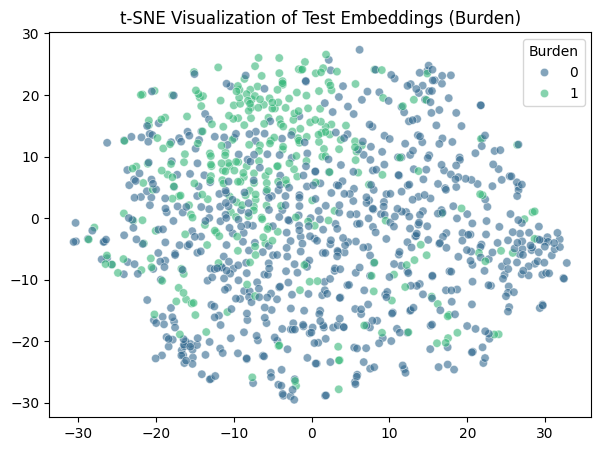

In [8]:
print("\nRunning PCA and t-SNE for visualization (may take a few minutes)...")

# Reduce to 50D with PCA, then to 2D with t-SNE for visualization
pca_50 = PCA(n_components=50).fit_transform(test_embeddings)
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=40).fit_transform(pca_50)

# Plot by 'belong' label
plt.figure(figsize=(7,5))
sns.scatterplot(x=tsne_2d[:,0], y=tsne_2d[:,1], hue=test_df['belong'], palette='coolwarm', alpha=0.6)
plt.title('t-SNE Visualization of Test Embeddings (Belong)')
plt.legend(title='Belong', loc='best')
plt.show()

# Plot by 'burden' label
plt.figure(figsize=(7,5))
sns.scatterplot(x=tsne_2d[:,0], y=tsne_2d[:,1], hue=test_df['burden'], palette='viridis', alpha=0.6)
plt.title('t-SNE Visualization of Test Embeddings (Burden)')
plt.legend(title='Burden', loc='best')
plt.show()

### Save Predictions

In [9]:
results_df = test_df.copy()
results_df['belong_pred'] = test_preds_belong
results_df['burden_pred'] = test_preds_burden
results_df.to_csv('test_predictions.csv', index=False)

print("\n✅ Predictions saved as 'test_predictions.csv'")


✅ Predictions saved as 'test_predictions.csv'
